# Temat: Co z moim pociągiem?
https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france

## Cel -> analiza opóźnień pociągów we Francji

## Stakeholder -> zarządca kolejowy, który potrzebuje zidentyfikować powody opóźnień na wybranych liniach kolejowych


#### DLA CHĘTNYCH  regresja, modelowanie, WSPÓŁLINIOWOŚĆ

# NOTATKI

### 1. Dodanie kolumny “Trainline”: df['Trainline'] = df['Departure station']+' - '+df['Arrival station']
### 2. Dodanie kolumny ‘Number of circulations’: df[‘Number of circulations’] = df[‘Number of expected circulations’] - df[‘Number of cancelled trains’]
### 3. Wyliczamy średnią dla ‘Number of circulations’ i odrzucamy wszystkie połączenia poniżej średniej (TBC)
### 4. Wybieramy po 5 połączeń z najwyższą średnią ważoną (ważoną po ‘Number of circulations’) dla wartości ‘Average delay of late arriving trains (min)’ i ‘Average delay of all arriving trains (min)’



#### Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import trains as dc
import datetime as dt
import random


### Wczytanie pliku Regularities_by_liaisons_Trains_France.csv

In [20]:
df = pd.read_csv('kaggle_data/Regularities_by_liaisons_Trains_France.csv')

### Wyświetlanie WSZYSTKICH kolumn w VS Code

In [22]:
pd.set_option('display.max_columns', None)

In [25]:
#df.columns = df.columns.str.replace(" ", "_")

#### Kopia zapasowa pliku CSV

In [17]:
df_clean = df.copy()

#### Usunięcie 2 kolumn

In [6]:
df_clean.drop(columns= ['Comment (optional) delays at departure', 'Comment (optional) delays on arrival'], inplace= True)

### Kolumny w zmiennej df_clean

In [119]:
df_clean.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Comment (optional) delays at departure',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       'Comment (optional) delays on arrival',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due

In [7]:
col_to_drop = dc.drop_treshold(df_clean)

df_clean.dropna(subset = col_to_drop, inplace = True)

In [45]:
df_clean.isna().sum()

Year                                                                                                                   0
Month                                                                                                                  0
Departure station                                                                                                      0
Arrival station                                                                                                        0
Average travel time (min)                                                                                              0
Number of expected circulations                                                                                        0
Number of cancelled trains                                                                                             0
Number of late trains at departure                                                                                     0
Average delay of late departing 

In [47]:
df_clean.Year.value_counts()

Year
2018    1486
2019    1465
2017    1342
2016    1297
2015    1295
2020     635
Name: count, dtype: int64

In [74]:
df_clean.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Number of circulations
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,0.0,7706.000000,7705.000000,7743.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7743.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,NaN,36.019595,32.737533,5.212800,0.267085,0.255042,0.191950,0.181099,0.067688,0.036435,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517,258.597701
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,NaN,29.210396,14.009948,8.397351,0.162804,0.160101,0.148808,0.132821,0.078780,0.057827,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651,154.696393
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,-472.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,NaN,16.000000,23.809420,2.829885,0.156250,0.150000,0.086957,0.092593,0.000000,0.000000,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000,154.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,NaN,28.000000,30.875000,4.680056,0.250000,0.235294,0.171429,0.161290,0.050000,0.017544,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386,221.000000
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,NaN,48.000000,39.124653,7.278924,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556,338.000000
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,NaN,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,869.000000


#### 10 największych opóźnień pociągów wraz ze stacjami

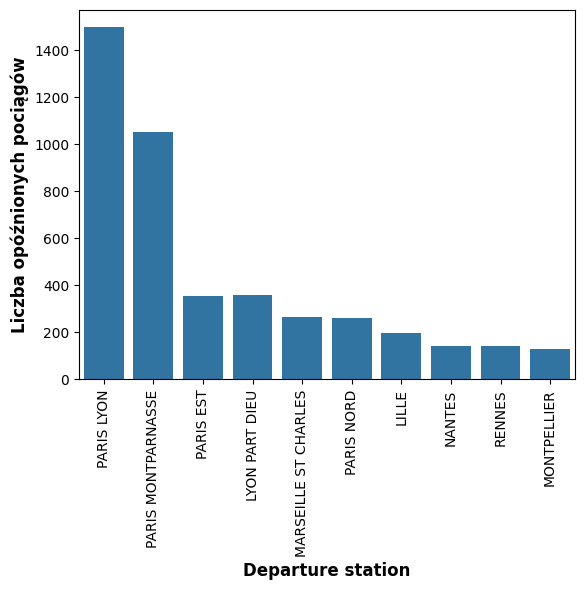

In [8]:
colors = random.sample(sns.color_palette("husl", 10), 10)

sns.countplot(data = df_clean, x = "Departure station", order = df['Departure station'].value_counts().index[:10], legend=False)

plt.ylabel("Liczba opóźnionych pociągów", fontweight = "bold", fontsize = 12)
plt.xlabel("Departure station", fontweight = "bold", fontsize = 12)
plt.xticks(rotation = 90,)
plt.show()

In [77]:
df_clean[df_clean['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)'] == 'External Causes']

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Number of circulations,Trainline


In [79]:
column_al = {
"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)": "External Causes",
"% trains late due to railway infrastructure (maintenance, works)": "Infrastructure"
}

correlation_matrix = df_clean[list(column_al.values())].corr()

plt.figure(figsize=(8, 6))

sns.barplot(x = correlation_matrix.index, y = correlation_matrix['Infrastructure'], hue = correlation_matrix.index, palette = "coolwarm")
plt.title("Korelacja między opóźnieniami zewnętrznymi a infrastrukturą kolejową", fontweight = "bold")
plt.xlabel("Przyczyny zewnętrzne")
plt.ylabel("Korelacja")
plt.xticks(rotation = 45)

plt.show()

KeyError: "None of [Index(['External Causes', 'Infrastructure'], dtype='object')] are in the [columns]"

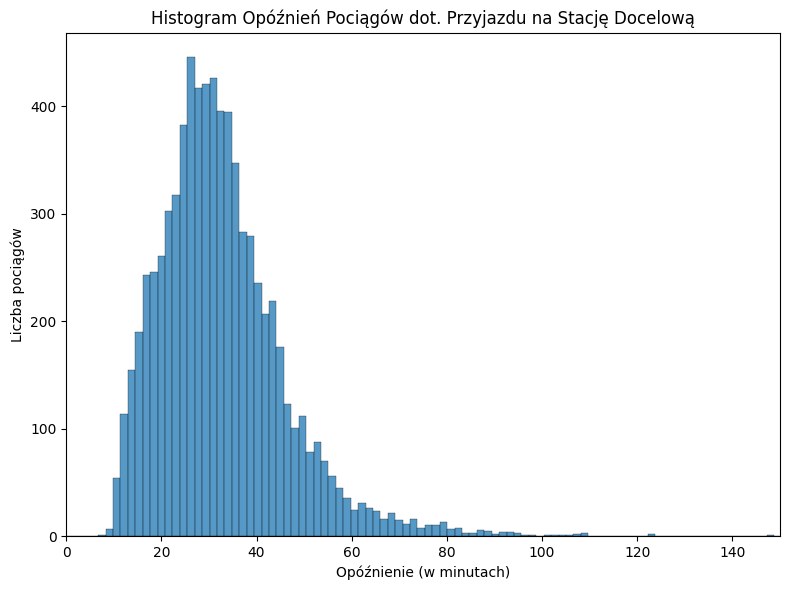

In [68]:
# Utwórz histogram za pomocą seaborn na podstawie rzeczywistych danych
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='Average delay of late arriving trains (min)')
plt.title('Histogram Opóźnień Pociągów dot. Przyjazdu na Stację Docelową')
plt.xlabel('Opóźnienie (w minutach)')
plt.ylabel('Liczba pociągów')

#plt.ylim(0, 1000)
plt.xlim(0, 150)

#stacje = df['Departure_station'].unique()[:3]
#plt.xticks(range(len(stacje)), stacje, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Zrobić regresję regplot(), modelowanie, WSPÓŁLINIOWOŚĆ

In [60]:
df_clean['Year'].value_counts()

Year
2018    1486
2019    1465
2017    1342
2016    1297
2015    1295
2020     635
Name: count, dtype: int64

#### Warto zacząć od Scatter plot

In [27]:
df_clean.groupby("Average travel time (min)")["Number of expected circulations"].mean().nlargest(10)

Average travel time (min)
148.309724    960.0
142.443670    896.0
142.167051    894.0
141.071174    878.0
140.289346    876.0
143.052934    871.0
141.109827    870.0
142.851415    864.0
143.317967    858.0
140.895270    844.0
Name: Number of expected circulations, dtype: float64

### Subtraction of canceled trips

In [28]:
df_clean['Number of circulations'] = df_clean['Number of expected circulations'] - df_clean['Number of cancelled trains']
df_clean['Number of circulations']

0       247.0
1       242.0
2       430.0
3       114.0
4       400.0
        ...  
7801    168.0
7802    199.0
7803    116.0
7804      NaN
7805     52.0
Name: Number of circulations, Length: 7806, dtype: float64

### Average 'Number of circulations'

In [118]:
avg_num_circulations = df_clean['Number of circulations'].mean()

##
delays_circ = df_clean[df_clean['Number of circulations'] > avg_num_circulations]
delays_circ_sorted = delays_circ.sort_values(by='Number of circulations', ascending = False)

delays_circ_sorted
##

avg_num_circulations

258.5977011494253

# >>>Weighted average<<<

In [32]:
w_sum_late_arriving = (delays_circ_sorted['Number of circulations'] * delays_circ_sorted['Average delay of late arriving trains (min)']).sum()
w_sum_all_arriving = (delays_circ_sorted['Number of circulations'] * delays_circ_sorted['Average delay of all arriving trains (min)']).sum()

w_avg_late_arriving = w_sum_late_arriving / delays_circ_sorted['Number of circulations'].sum()
w_avg_all_arriving = w_sum_all_arriving / delays_circ_sorted['Number of circulations'].sum()

print(f"Średnia ważona dla 'Average delay of LATE arriving trains (min)': {w_avg_late_arriving:.2f}")
print(f"Średnia ważona dla 'Average delay of ALL arriving trains (min)': {w_avg_all_arriving:.2f}")

Średnia ważona dla 'Average delay of LATE arriving trains (min)': 30.41
Średnia ważona dla 'Average delay of ALL arriving trains (min)': 4.81


In [ ]:
top_5_late_arriving = delays_circ_sorted[delays_circ_sorted['Number of circulations'] > w_avg_late_arriving]

print(f"Połączenia z największą średnią ważoną dla 'Average delay of LATE arriving trains (min)':\n{top_5_late_arriving.head(10)}")

In [63]:
top_5_all_arriving = delays_circ_sorted[delays_circ_sorted['Average delay of all arriving trains (min)'] > w_avg_all_arriving].head(20)

print(f"Połączenia z największą średnią ważoną dla 'Average delay of ALL arriving trains (min)':\n{top_5_all_arriving.head(20)}")

Połączenia z największą średnią ważoną dla 'Average delay of ALL arriving trains (min)':
      Year  Month   Departure station     Arrival station  \
811   2019    3.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
3195  2018    1.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
3785  2019    1.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
4063  2018    3.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
2733  2017    9.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
2622  2019    6.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
6410  2018   12.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
3028  2017   12.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
1967  2017   10.0  PARIS MONTPARNASSE    BORDEAUX ST JEAN   
6420  2019    7.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
5128  2018   10.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
1374  2018   11.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
6920  2019   10.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE   
5038  2018    9.0    BORDEAUX ST JEAN  PARIS MONTPARNASSE

### Connection two columns 'Departure station' and 'Arrival station' TRAINLINE

In [90]:
df_clean['Trainline'] = df_clean['Departure station'] + ' - ' + df_clean['Arrival station']
df_clean['Trainline']

0                 ANGOULEME - PARIS MONTPARNASSE
1         PARIS MONTPARNASSE - LA ROCHELLE VILLE
2                   LE MANS - PARIS MONTPARNASSE
3                   ST MALO - PARIS MONTPARNASSE
4       PARIS MONTPARNASSE - ST PIERRE DES CORPS
                          ...                   
7801                    PARIS LYON - AVIGNON TGV
7802           PARIS LYON - MARSEILLE ST CHARLES
7803                          PARIS LYON - NIMES
7804     PARIS LYON - SAINT ETIENNE CHATEAUCREUX
7805                         TOULON - PARIS LYON
Name: Trainline, Length: 7806, dtype: object

In [60]:
max_delay = df['Average delay of all departing trains (min)'].max()

delay_all_departing = df['Average delay of all departing trains (min)']

print(f"Największe opóźnienie odjeżdżającego pociągu: {max_delay:.1f} minut")

Największe opóźnienie odjeżdżającego pociągu: 173.6 minut


### Biggest delay trainline between 2015 and 2020

In [45]:
delay_year_2015 = df_clean[df_clean['Year'] >= 2015 and df_clean['Year'] <= 2020]['Average delay of late departing trains (min)'].max()

if delay_year_2015 > w_avg_late_arriving:
    print(f"Największe opóźnienie w 2015 roku było na linii: \n{df_clean['Trainline'].head(1)} i wynosi {delay_year_2015} min")


Największe opóźnienie w 2015 roku było na linii: 
0    ANGOULEME - PARIS MONTPARNASSE
Name: Trainline, dtype: object i wynosi 73.5 min



### Average circulations each year since 2015

In [87]:
max_circulations_each_year = df_clean.groupby('Year')['Number of circulations'].mean()

max_circulations_each_year

Year
2015    288.190476
2016    273.512649
2017    288.635417
2018    245.546795
2019    249.888211
2020    159.376296
Name: Number of circulations, dtype: float64

### Average delay depending on disruptions

In [73]:
factors = ['Delay due to external causes', 'Delay due to railway infrastructure',
           'Delay due to traffic management', 'Delay due to rolling stock']

for factor in factors:
    avg_delay = df_clean[factor].mean()
    print(f"Średnie opóźnienie ({factor}): {avg_delay} minut")

Średnie opóźnienie (Delay due to external causes): 26.755615707278032 minut
Średnie opóźnienie (Delay due to railway infrastructure): 25.521697834192132 minut
Średnie opóźnienie (Delay due to traffic management): 19.175148654355052 minut
Średnie opóźnienie (Delay due to rolling stock): 18.097857853627865 minut


### The impact of the pandemic (2020) on train delays
### 'Average delay of all departing trains (min)' and 'Average delay of late arriving trains (min)' 

In [137]:
delay_pandemic_all_arriving_trains = df_clean[(df_clean['Year'] == 2020) & (df_clean['Average delay of all arriving trains (min)'] > w_avg_all_arriving)][['Trainline','Average delay of all arriving trains (min)']].sort_values(by = 'Average delay of all arriving trains (min)', ascending = False).head(25)

delay_pandemic_late_arriving_trains = df_clean[(df_clean['Year'] == 2020) & (df_clean['Average delay of late arriving trains (min)'] > w_avg_late_arriving)][['Trainline','Average delay of late arriving trains (min)']].sort_values(by = 'Average delay of late arriving trains (min)', ascending = False).head(25)

#delay_pandemic_all_arriving_trains = df_clean[(df_clean['Year'] == 2020) & (df_clean['Average delay of all arriving trains (min)'] > w_avg_all_arriving)][['Trainline', 'Average delay of all arriving trains (min)']].sort_values(by='Average delay of all arriving trains (min)', ascending=False).head(25)
delay_pandemic_all_arriving_trains
#delay_pandemic_late_arriving_trains


,Trainline,Average delay of all arriving trains (min)
7421,STRASBOURG - PARIS EST,83.388889
7088,STUTTGART - PARIS EST,61.816667
7526,PARIS LYON - ZURICH,37.838235
7054,NANTES - STRASBOURG,27.489286
7149,ST PIERRE DES CORPS - PARIS MONTPARNASSE,24.795833
7420,PARIS EST - STRASBOURG,23.980000
7527,ZURICH - PARIS LYON,22.825000
7627,ITALIE - PARIS LYON,20.655172
7007,TOURCOING - BORDEAUX ST JEAN,17.988462
7506,BORDEAUX ST JEAN - PARIS MONTPARNASSE,17.791071
